# Perceptron

Importowanie niezbędnych bibliotek

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

Zdefiniowanie zbioru danych

In [2]:
training_data = [
      (np.array([0,0,1]), 0),
      (np.array([0.2,0.2,1]), 0),
      (np.array([0.4,0.4,1]), 0),
      (np.array([0.4,0.2,1]), 0),
      (np.array([0.2,0.4,1]), 0),
      (np.array([0,1,1]), 0),
      (np.array([1,0,1]), 0),
      (np.array([1.2,1.2,1]), 1),
      (np.array([1.4,1.4,1]), 1),
      (np.array([1.4,1.2,1]), 1),
      (np.array([1.2,1.4,1]), 1),
      (np.array([1,1,1]), 1),
      (np.array([1.1,1.1,1]), 1),
]

## 1.1 Teoria

**Perceptron** – najprostsza sieć neuronowa, składająca się z jednego bądź wielu niezależnych neuronów McCullocha-Pittsa, implementująca algorytm uczenia nadzorowanego klasyfikatorów binarnych. Perceptron jest funkcją, która potrafi określić przynależność parametrów wejściowych do jednej z dwóch klas. Może być wykorzystywany tylko do klasyfikowania zbiorów liniowo separowalnych. 

![title](imgs/perceptron-picture.png)

Schemat ten możemy również przedstawić jako zwykłe mnożenie macierzy. 

![title](imgs/perceptron_matrix.png)

**Funkcja aktywacji jako funkcja sigmoidalna**

Aby otrzymać wartość funkcji reprezentującą **przynależność do klasy 0 bądź 1** stosujemy funkcję sigmoidalną.

![title](imgs/sigmoid.png)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**Definiujemy wartości**

Inicjalizujemy wagi losowymi wartościami z rozkładu jednorodnego.

In [4]:
w = np.random.uniform(0, 1, size=(3,)).transpose()
errors = []
eta = 0.01
n = 100000

## 1.2 Uczenie algorytmu

### 1.2.1 Kroki uczenia algorytmu

<font color='red'>**Uczenie sieci neuronowej zawsze odbywa się w dwóch krokach:**<br><br>
1. Pierwszy krok, **forward** - uzyskanie wyniku,<br>
2. Drugi krok, **backward** - obliczenie błędu oraz zredukowanie go. <br></font>

Do uczenia modelu poprawnej klasyfikacji objektów wykorzystuję się algorytm o nazwię **Delta rule** jest to algorytm oparty o *przeszukiwanie gradientowe* (*Gradient descent*), który polega na redukowaniu błędu algorytu poprzez odejmowaniu od wag ich gradientu błędu

![title](imgs/gd.png)

**Dlaczego taka metoda sprawdza się najlepiej ?** <br>
Ponieważ "poprawiamy" błąd, który pochodzi od każdej z wag

### 1.2.2 Funkcja kosztu

**Na początku jednak należy zastanowić się ile wynosi taki błąd i jak go obliczyć** <br>
Najbardziej oczywiste rozwiązanie **Odejmij wyjście algorytmu od oczekiwanego wyjścia** czyli **MSE**

![title](imgs/mse.png)

Aktualnie jesteśmy w stanie obliczyć globalny błąd dla całego modelu, jednak interesuję nas obliczenie błędu, który pochodzi z konkretnej "wagi"/"gałęzi". Aby to uzyskać możemy wykorzystać regułę łańcuchową.

![title](imgs/e_total.png)

![title](imgs/backprop_model.png)

**1. Pierwsza pochodna** <br>
W pierwszym kroku obliczamy pochodną po funkcji kosztów.

![title](imgs/der1.png)

**2. Druga pochodna** <br>
Następnie liczymy pochodną po funkcji aktywacji

![title](imgs/der2.png)

*Łatwo również dostrzec w tym przypadku dlaczego funkcja Sigmoid nie jest najlepszą funkcją aktywacji*

**3. Trzecia pochodna** <br>
W kroku trzecimy liczymy pochodną po *"wyjściu z poprzedniej warstwy"*. 

![title](imgs/der3.png)

**Wszystko w jednym ! W końcu !**

![title](imgs/concat.png)

In [5]:
# w = np.random.normal(0., 10, (3,))

def forward(w, x):
    result = np.dot(w, x)
    return sigmoid(result)

def backward(w, x, expected, prev_out):
    error = (expected - prev_out)**2
    error_final = (expected - prev_out) * prev_out * (1 - prev_out)
    errors.append(error)
    w += eta * error_final * x
    
for i in range(n):
    x, expected = random.choice(training_data)
    prev_out = forward(w, x)
    backward(w, x, expected, prev_out)

### 1.2.3 Cross-entropy

Powyżej przedstawiona funkcja kosztu **MSE** jest bardzo łatwą do obliczenia funkcją, jednak wykorzystanie jej sprawdza się tylko wyjątkowo dobrze w przypadku **zadania regresji**, dla zadania klasyfikacji metoda ta może prowadzić do występowania szumu oraz zanikania gradientu.

![title](imgs/cross_entr.png)

#### Przykład wykorzystanie Cross entropy i MSE

![title](imgs/tabl1.png)

*Funkcja kosztu dla powyższej sieci neuronowej wynosi 1/3 = 0.33*

![title](imgs/table2.png)

*Funkcja kosztu dla powyższej sieci neuronowej również wynosi 1/3 = 0.33*

Druga sieć jednak zachowuję się w bardziej porządany sposób niż sieć pierwsza, w dwóch pierwszych przypadkach cechuję się bardzo dobrymi wynikami, gdzie w trzecim przypadku niewiele się myli.

Rozważmy entropię krzyżową jako funkcję kosztu

**Entropia krzyżowa dla pierwszej sieci** <br>
-(ln(0.4) + ln(0.4) + ln(0.1)) / 3 = 1.38 <br>
**Entropia krzyżowa dla sieci drugiej** <br>
-(ln(0.7) + ln(0.7) + ln(0.3)) / 3 = 0.64 <br>

Oprócz różnicy czysto praktycznej entropia krzyżowa posiada swoje zalety z matematycznego punktu widzenia. <br>
* Po pierwsze może być ona przedstawiona jako dywergencja **Kullback–Leibler'a** pomiędzy $P(Y | X)$ danych oraz $Q(Y | X)$ modelu,
* Po drugie jej pochodna ma dużo bardziej sprzyjającą formę.

Wykorzystując **MSE** gradient posiada czynnik $output * (1 - output)$. Podczas gdy wyjście staje się coraz bardziej odobne do oczekiwanego wyjścia wartość gradientu staję się coraz mniejsza, przez co zmiany wag stają się stosunkowo coraz mniejsze. W **cross-entropy** czynnik ten zanika. 

#### Obliczanie gradientu dla entropii krzyżowej

*Przeykładowy graf sieci wykorzystany w celu zwizualizowania oznaczeń wykorzystanych w równaniach*

![title](imgs/cross_net.png)

![title](imgs/layer_out_12.png)

Następnie tak jak w przypadku **MSE** za pomocą chain rule liczymy pochodne

![title](imgs/derivatives21.png)

Łączymy wszystko razem

![title](imgs/derivatives22.png)

In [6]:
w = np.random.uniform(0, 1, size=(3,)).transpose()
errors = []
eta = 0.01
n = 100000

def forward(w, x):
    logits = np.dot(w, x)
    return sigmoid(logits)

def backward(w, x, prev_layer_out):
    error = expected * np.log(prev_layer_out) + (1 - expected) * np.log(1 - prev_layer_out)
    error_final = (prev_layer_out - expected)
    errors.append(-error)
    w -= eta * error_final * x
    
for i in range(n):
    x, expected = random.choice(training_data)
    prev_layer_out = forward(w, x)
    backward(w, x, prev_layer_out)

## 1.3 Testowanie algorytmu

Wyświetlamy obejty ze zbioru treningowego wraz z odpowiadającymi im wartościami wyjścia modelu.

In [7]:
for x, _ in training_data:
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, round(sigmoid(result))))

[0 0]: -9.61734828979 -> 0.0
[0.2 0.2]: -7.07486552532 -> 0.0
[0.4 0.4]: -4.53238276085 -> 0.0
[0.4 0.2]: -5.80600046907 -> 0.0
[0.2 0.4]: -5.8012478171 -> 0.0
[0 1]: -3.24925974869 -> 0.0
[1 0]: -3.27302300855 -> 0.0
[1.2 1.2]: 5.63754829701 -> 1.0
[1.4 1.4]: 8.18003106148 -> 1.0
[1.4 1.2]: 6.90641335326 -> 1.0
[1.2 1.4]: 6.91116600523 -> 1.0
[1 1]: 3.09506553255 -> 1.0
[1.1 1.1]: 4.36630691478 -> 1.0


Wyświetlamy błąd algorytmu dla rosnącej liczby epok.

(-1, 1)

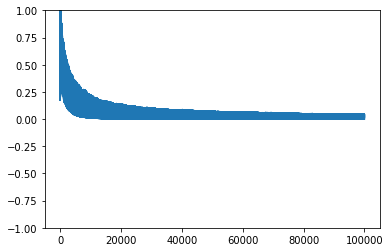

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(errors)
ax.set_ylim([-1, 1])

Rysunek przedstawia punkt ze zbioru danych na dwuwymairowej płaszczyźnie oraz wytyczoną przez algorytm granicę pełniącą funkcję separującą dla obszaru obu klas. Perceptron liniowy niestety zdolny jest tylko do separacji punktów będących linowo separowalne.

![title](imgs/linear_sep.png)

**Ploting separation line for perceptron** <br>
$slope = -\frac{(w_0/w2)}{(w_0/w_1)}$  
$intercept = -\frac{w_0}{w_2}$

![title](imgs/line.png)

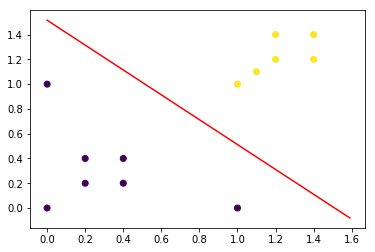

In [9]:
# Figure 2
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter([x[0][0] for x in training_data], [x[0][1] for x in training_data], 
            c=[x[1] for x in training_data])
line_scale = np.arange(0, 160) / 100.0
lin_func = (w[1] / -w[0]) * line_scale + w[2] / -w[0]
plt.plot(line_scale, lin_func, 'r')